In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [46]:
def optimizer(df_,levarage=10):
    bestsl = 0
    bestts = 0
    df = df_.copy()
    result = 0
    bestresult = 0
    dongu = 0
    stopLoss = 0.1  # En dıştaki döngü için başlangıç değeri
    while stopLoss <= 2:  # En dıştaki döngünün koşulu
        trailing_startsat = 0.1  # Orta döngü için başlangıç değeri
        while trailing_startsat <= 2:  # Orta döngünün koşulu

            df['Sonuc'] = df.apply(lambda row: profit_cal2(row['drawdown'], row['drawup'],stopLoss=stopLoss,
                                                     trailingstop_start = trailing_startsat,trailingstop_follow=0.1,levarage=levarage), axis=1)
            result = df[df['Sonuc'] > 0]['Sonuc'].sum()

            print(f'Dongu:  {dongu} Result: {result} StopLoss {stopLoss} TS {trailing_startsat}')
            dongu += 1
            if result > bestresult:
                bestresult = result
                bestsl = stopLoss
                bestts = trailing_startsat


            trailing_startsat += 0.05  # Orta döngür
        stopLoss += 0.05  # En dıştaki döngü
    print(f'Best Result:  {bestresult}')
    return bestsl , bestts

In [3]:
def profit_cal2(drawdown,drawup,stopLoss,trailingstop_start,trailingstop_follow,levarage=10):
  stopLoss = levarage * -1 * stopLoss
  trailingstop_start = levarage * trailingstop_start
  trailingstop_follow = levarage * trailingstop_follow
  profitpercent = 0
  if stopLoss >= drawdown:
    profitpercent = stopLoss + (random.random()/5)
  if drawup == 0:
    profitpercent = drawdown + (random.random()/5)

  elif drawup >= trailingstop_start:
    profitpercent = drawup - trailingstop_follow - (random.random()/5)

  if profitpercent == 0:
    profitpercent = drawdown + (random.random()/5)
  if drawdown > profitpercent:
    profitpercent = drawdown
  if profitpercent > drawup:
    profitpercent = drawdown + (random.random()/5)

  return profitpercent

In [17]:
def graph(df,new_sl,new_ts,new_tf=0.1,min=-20,maks=25,levarage=10,bins=250):
    df_new = df.copy()
    df_new['Sonuc'] = df_new.apply(lambda row: profit_cal2(row['drawdown'], row['drawup'],stopLoss=new_sl
                                                     ,trailingstop_start=new_ts,trailingstop_follow=new_tf,levarage=levarage), axis=1)

    plt.hist(df_new["profitpercent"], bins=bins, color='red', alpha=0.65, label='Profitpercent')
    plt.hist(df_new["Sonuc"], bins=bins, color='blue', alpha=0.65, label='New Profitpercent')

    # Maksimum ve minimum değerlere göre grafik sınırlarını ayarlama
    plt.xlim(min,maks)

    # Grid eklemek
    plt.grid(True)

    # Eksen etiketleri ve başlık ekleme (isteğe bağlı)
    plt.xlabel('Değer')
    plt.ylabel('Frekans')
    plt.title('Optimizasyon Histogramı')

    # Legend (Açıklama) eklemek
    plt.legend()

    # Grafiği gösterme
    plt.show()
    print(f'Zarar: {df_new[df_new["profitpercent"] <= 0]["profitpercent"].mean()} - kar: {df_new[df_new["profitpercent"] >= 0]["profitpercent"].mean()} - ortalama: {df_new.profitpercent.mean()} - toplam: {df_new.profitpercent.sum()}')
    print(f'Zarar: {df_new[df_new["Sonuc"] <= 0]["Sonuc"].mean()} - kar: {df_new[df_new["Sonuc"] >= 0]["Sonuc"].mean()} - ortalama: {df_new.Sonuc.mean()} - toplam: {df_new.Sonuc.sum()}')

In [5]:
df_ = pd.read_excel("Strateji Analiz.xlsx",sheet_name="Sayfa1")

In [6]:
df = df_.copy()

In [7]:
df.head()

,strategyname,parity,stopLossValue,takeProfitValue,trailingstop_startsat,trailingstop_followdistance,profitpercent,leverage,drawup,drawdown,enterdate,exitdate
0,Algo6,BSV-USDT-SWAP,1.0,NaN,0.2,0.15,5.366162,10,6.944444,-5.050505,"""2023-09-01T00:25:41.200Z""","""2023-09-01T00:42:38.702Z"""
1,Algo3,DASH-USDT-SWAP,1.0,NaN,0.2,0.15,-9.633911,10,0.000000,-9.633911,"""2023-08-31T22:25:36.285Z""","""2023-09-01T00:42:36.674Z"""
2,Algo6,BAL-USDT-SWAP,1.0,NaN,0.2,0.15,3.759398,10,6.362059,-0.867553,"""2023-08-31T23:02:16.354Z""","""2023-09-01T00:01:43.882Z"""
3,Algo3,BADGER-USDT-SWAP,1.0,NaN,0.2,0.15,4.008016,10,5.511022,0.000000,"""2023-08-31T23:12:13.947Z""","""2023-09-01T00:02:16.387Z"""
4,Algo6,BSV-USDT-SWAP,1.0,NaN,0.2,0.15,-0.639591,10,1.918772,-4.157339,"""2023-08-31T22:32:10.708Z""","""2023-09-01T00:02:37.669Z"""


In [8]:
algo1 = df[df["strategyname"] == "Algo1"] #10
algo2 = df[df["strategyname"] == "Algo2"] #10
algo3 = df[df["strategyname"] == "Algo3"] #10
algo4 = df[df["strategyname"] == "Algo4"] #10
algo5 = df[df["strategyname"] == "Algo5"] #5
algo6 = df[df["strategyname"] == "Algo6"] #10
algo7 = df[df["strategyname"] == "Algo7"] #10
algo8 = df[df["strategyname"] == "Algo8"] #10
algo9 = df[df["strategyname"] == "Algo9"] #10
algo10 = df[df["strategyname"] == "Algo10"] #10


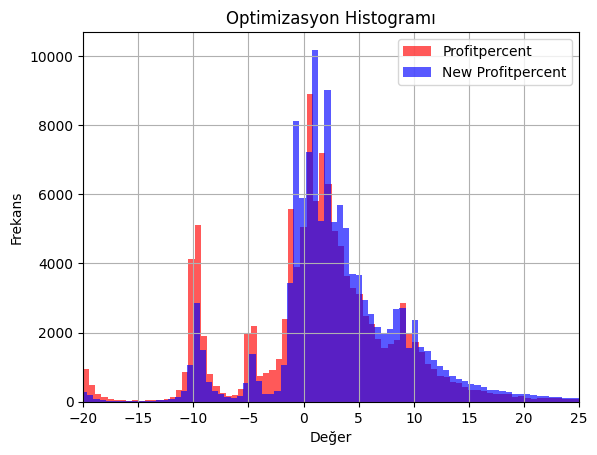

Zarar: -6.72724855125916 - kar: 5.347152750187958 - ortalama: 1.1399572047491229 - toplam: 137840.20532664968
Zarar: -4.442644238071233 - kar: 5.734629581628825 - ortalama: 3.416596712827171 - toplam: 413124.624724923


In [36]:
graph(df,new_sl=0.09,new_ts=0.09,new_tf=0.1,bins=900)

# **ALGO1 İÇİN OPTİMİZASYON**

In [47]:
algo1_optimizer = optimizer(algo1)

Dongu:  0 Result: 24673.080236122718 StopLoss 0.1 TS 0.1
Dongu:  1 Result: 24517.732313870394 StopLoss 0.1 TS 0.15000000000000002
Dongu:  2 Result: 24204.26436421303 StopLoss 0.1 TS 0.2
Dongu:  3 Result: 21641.195573460343 StopLoss 0.1 TS 0.25
Dongu:  4 Result: 20277.67450925817 StopLoss 0.1 TS 0.3
Dongu:  5 Result: 18053.368213176185 StopLoss 0.1 TS 0.35
Dongu:  6 Result: 15905.056845925099 StopLoss 0.1 TS 0.39999999999999997
Dongu:  7 Result: 14316.658251878453 StopLoss 0.1 TS 0.44999999999999996
Dongu:  8 Result: 12561.599360856551 StopLoss 0.1 TS 0.49999999999999994
Dongu:  9 Result: 11073.91273960545 StopLoss 0.1 TS 0.5499999999999999
Dongu:  10 Result: 10021.378995269395 StopLoss 0.1 TS 0.6
Dongu:  11 Result: 8960.291222539108 StopLoss 0.1 TS 0.65
Dongu:  12 Result: 7910.196841199699 StopLoss 0.1 TS 0.7000000000000001
Dongu:  13 Result: 7125.207394607576 StopLoss 0.1 TS 0.7500000000000001
Dongu:  14 Result: 6246.164637681006 StopLoss 0.1 TS 0.8000000000000002
Dongu:  15 Result: 5

In [49]:
algo1_optimizer

(1.5500000000000007, 0.1)

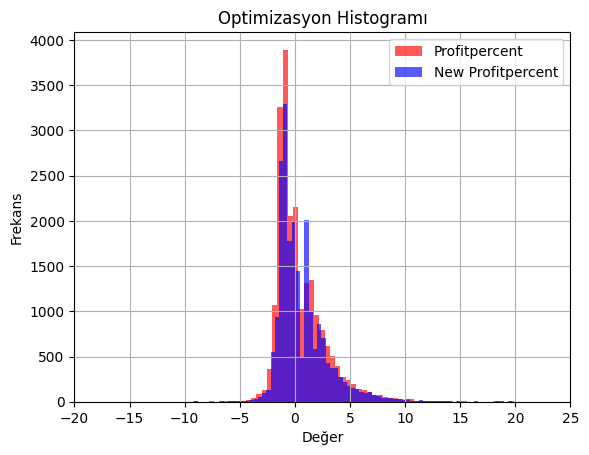

Zarar: -1.0114754157965427 - kar: 2.302782138707104 - ortalama: 0.5179714743095417 - toplam: 11193.363559829197
Zarar: -1.0198748065268468 - kar: 2.2288270584854537 - ortalama: 0.6350730537717343 - toplam: 13723.928692007179


In [50]:
graph(algo1,1.55,0.1,0.1)

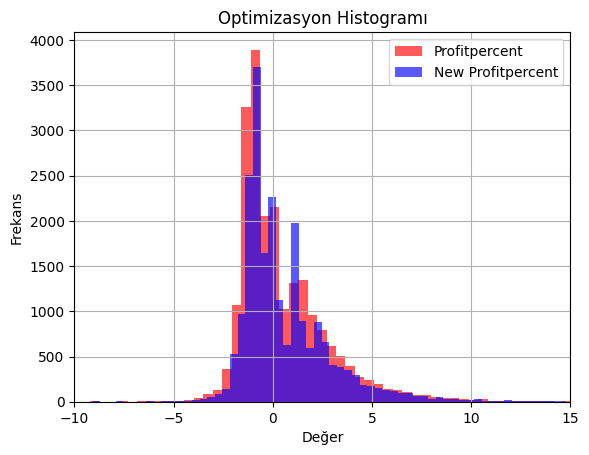

Zarar: -1.0114754157965427 - kar: 2.302782138707104 - ortalama: 0.5179714743095417 - toplam: 11193.363559829197
Zarar: -0.9929190671506241 - kar: 2.2229037713468887 - ortalama: 0.6501289517134498 - toplam: 14049.28664652765


In [41]:
graph(algo1,0.1,0.1,0.1,-10,15)

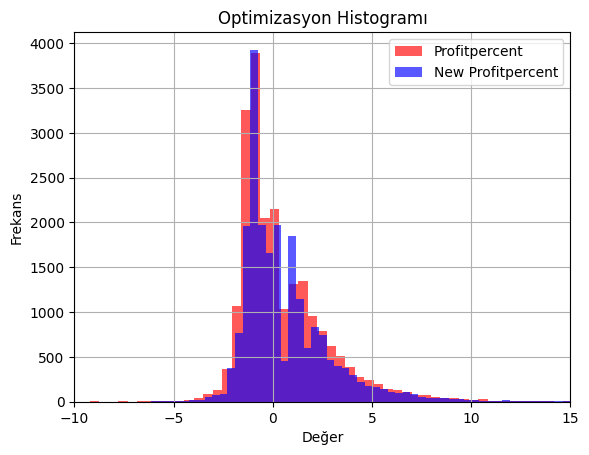

Zarar: -1.0114754157965427 - kar: 2.302782138707104 - mean: 0.5179714743095417 - mean: 11193.363559829197
Zarar: -0.9905309087950465 - kar: 2.2276630840337894 - mean: 0.6496077499121893 - mean: 14038.023475602411


In [ ]:
graph(algo1,0.1,0.1,0.1,-10,15)

# ALGO2 İÇİN OPTİMİZASYON


In [51]:
algo2_optimizer = optimizer(algo2)

Dongu:  0 Result: 125726.21817022309 StopLoss 0.1 TS 0.1
Dongu:  1 Result: 125658.49259807734 StopLoss 0.1 TS 0.15000000000000002
Dongu:  2 Result: 125410.78874006344 StopLoss 0.1 TS 0.2
Dongu:  3 Result: 124984.20822101436 StopLoss 0.1 TS 0.25
Dongu:  4 Result: 124393.2781025721 StopLoss 0.1 TS 0.3
Dongu:  5 Result: 123673.83508013649 StopLoss 0.1 TS 0.35
Dongu:  6 Result: 122920.91179713958 StopLoss 0.1 TS 0.39999999999999997
Dongu:  7 Result: 122003.12226859502 StopLoss 0.1 TS 0.44999999999999996
Dongu:  8 Result: 120979.01885856487 StopLoss 0.1 TS 0.49999999999999994
Dongu:  9 Result: 119972.85904766835 StopLoss 0.1 TS 0.5499999999999999
Dongu:  10 Result: 118704.42863003002 StopLoss 0.1 TS 0.6
Dongu:  11 Result: 117545.91564152158 StopLoss 0.1 TS 0.65
Dongu:  12 Result: 116289.29465600374 StopLoss 0.1 TS 0.7000000000000001
Dongu:  13 Result: 115169.2079171316 StopLoss 0.1 TS 0.7500000000000001
Dongu:  14 Result: 113940.43169965259 StopLoss 0.1 TS 0.8000000000000002
Dongu:  15 Resu

Yeni stoploss değeri: 0.52 \
Yeni trailingstop_startsat değeri: 0.86

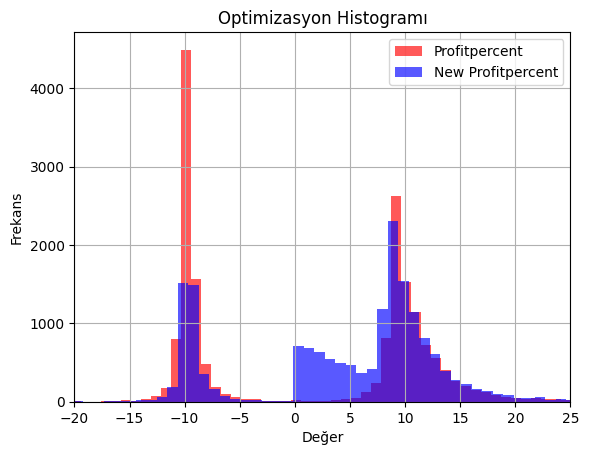

Zarar: -9.574798642554299 - kar: 11.56598866382356 - ortalama: 1.8939648597737146 - toplam: 33723.93829313076
Zarar: -9.315589065163218 - kar: 9.17432999293578 - ortalama: 4.914774338868495 - toplam: 87512.47187789241


In [53]:
graph(algo2,1.6,0.1,0.1)

In [52]:
algo2_optimizer

(1.6000000000000008, 0.1)

# **ALGO3 İÇİN OPTİMİZASYON**

In [ ]:
algo3_optimizer = optimizer(algo3)

In [ ]:
algo3_optimizer

In [ ]:
graph(algo3,new_sl=1.54,new_ts=0.34,new_tf=0.1,min=-12,maks=15)

# **ALGO4 İÇİN OPTİMİZASYON**

In [ ]:
algo4_optimizer = optimizer(algo4)

In [ ]:
algo4_optimizer

In [ ]:
graph(algo4,2.04,0.32,0.1,bins=500)

# **ALGO5 İÇİN OPTİMİZASYON**

In [ ]:
algo5_optimizer = optimizer(algo5,levarage=5)

In [ ]:
algo5_optimizer

In [ ]:
graph(algo5,1.04,0.45,levarage=5)

# **ALGO6 İÇİN OPTİMİZASYON**

In [ ]:
algo6_optimizer = optimizer(algo6)

In [ ]:
algo6_optimizer

In [ ]:
graph(algo6,1.60,0.30,0.05)

# **ALGO7 İÇİN OPTİMİZASYON**

In [ ]:
algo7_optimizer = optimizer(algo7)

In [ ]:
algo7_optimizer

In [ ]:
graph(algo7,new_sl=0.64,new_ts=1.48,new_tf=0.1)

# **ALGO8 İÇİN OPTİMİZASYON**

In [ ]:
algo8_optimizer = optimizer(algo8)

In [ ]:
algo8_optimizer

In [ ]:
graph(algo8,0.55,0.1,0.1,min=-13,maks=13)

# **ALGO9 İÇİN OPTİMİZASYON**

In [ ]:
algo9_optimizer = optimizer(algo9)

In [ ]:
algo9_optimizer

In [ ]:
graph(algo9,0.4,0.46,0.1,min=-25,maks=30)

# **ALGO10 İÇİN OPTİMİZASYON**

In [ ]:
algo10_optimizer = optimizer(algo10)

In [ ]:
algo10_optimizer

In [ ]:
graph(algo10,0.80,0.2,min=-10,maks=13)